# Projet L2I1 : Machine Learning from disaster

# NOTEBOOK
Auteurs :  Timothé Miel, Melissa Merabet, Mathieu Antonopoulos, Hongxiang Lin 

In [35]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

# 1] L'analyse des données

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

On dispose de 2 fichiers : train.csv et test.csv.
Nous allons analyser les différentes données à notre disposition afin de déterminer les principales variables jouant sur la survie d'un passager. 

## Données disponibles : 

| Variable	| Definition | 	Key | 
|:---------:|:----------:|:----:|
|survival |	Survival |	0 = No, 1 = Yes|
|pclass	| Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex |	Sex	||
|Age |	Age in years|	|
|sibsp |	# of siblings / spouses aboard the Titanic	||
|parch |	# of parents / children aboard the Titanic	||
|ticket |	Ticket number	||
|fare |	Passenger fare	||
|cabin |	Cabin number||	
|embarked |	Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|

**pclass**: Statut sociale :
- 1st = haute
- 2nd = moyenne 
- 3rd = basse

**sibsp**: Nombre de membres de la famille (Frère/soeur, époux/femme)

**parch**: Nombre de parents / enfants.


## A) Lecture des données 

In [65]:
# lecture des données
train=pd.read_csv("./../Data/train.csv")
test=pd.read_csv("./../Data/test.csv")

In [66]:
#l'entete du dataframe train
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
#les dimensions du dataset train
train.shape

(891, 12)

In [68]:
#informations sur les colonnes du train comme le nom, le nombre de valeurs non nulles et le type 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
train['Survived'].value_counts()  

0    549
1    342
Name: Survived, dtype: int64

Il y a eu 549 morts et 342 survivants

In [70]:
#La somme des valeurs manquantes dans chaque colonne du dataframe train
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- On observe qu'il y a 177 valeurs manquantes dans la colonne "Age", ce qui représente 20% des données du dataframe. L'âge est une donnée importante pour la prédiction de la survie d'un passager et devra donc être complétée.

- Il manque 687 valeurs dans la colonne "cabin" qui équivaut à 77% des données ce qui est énorme.

- Il n'y a que 2 valeurs manquantes dans la colonne "Embarked", on peut simplement les retirer ou les remplir par la valeur la plus fréquente.

In [71]:
#Supression de la colonne 'PassengerId"
del train['PassengerId']

Comme les valeurs de la colonne "PassengerId" sont unique à chaque passagers, cela nous fournit aucune information exploitable. Afin d'éviter de surcharger le modèle lors de l'entrainement, on supprime cette feature. 

## B) Remplissage des valeurs manquantes

### Age

In [72]:
#Quelques statistiques sur la colonne "Age"
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [73]:
#Remplissage des valeurs manquantes de la colonne age 
train['Age'] = train['Age'].fillna(train['Age'].median())
#train['Age'] = train.groupby(['Pclass','Sex'])['Age'].apply(lambda x:x.fillna(x.median()))
#train['Age'] = train['Age'].fillna(train.query('Pclass==1')['Age'].median())
#train['Age'] = train['Age'].fillna(train.query('Pclass==2')['Age'].median())
#train['Age'] = train['Age'].fillna(train.query('Pclass==3')['Age'].median())
#print(train['Age'].mean())


Il manque de nombreuses données concernant l'âge des passagers (177/890). Cependant nous pouvons nous baser sur les données disponibles pour détermienr un âge probable pour chacun des 177 passagers.

**Hypothèse 1** : Remplacer les âges manquants par la médiane des âges. Afin de ne pas être influencé par les valeurs d'âge extrème, nous avons opté pour la médiane de l'ensemble des âge et non-pas la moyenne. Cependant les valeurs de médiane et moyenes sont très proche (respectivemen 32.0 et 31.1), la différence n'étant pas réellement significative, nous avons convenu de conserver la médiane. En utilisant la médiane, on obtenait un score de 0.806.

**Hypothèse 2** : déterminer l'âge à partir de la donnée pclass, en effet nous partons de l'hypothèse que les passagers de 1er classe sont plus agés que ceux des classes inférieurs. On a observé une différence significative de l'âge en fonction de la classe. Nous pouvons en conclure qu'il est pertinent de définir l'âge en fonction de la classe. On a donc complété de la façon suivante:

            1er classe : 38 ans 
            2e classe : 30 ans 
            3e classe : 24 ans
On a ici obtenu un score de 0.79.

**Hypothèse 3** : remplacer tous les âges manquants par la médiane d'âge des passagers du même sex. Cependant nous avons obtenu un score de 0.77, nous avons conclu que cette méthode créer une corrélation entre l'âge et le sex et reviendrait donc à doubler l'importance de cette feature sans réellement apporter d'informations supplémentaire.  


Nous avons donc conclu que la complétion de l'âge par la médiane est la meilleure solution.

### Embarked

In [74]:
#Description statistique des valeurs de la colonne "Embarked"
train.Embarked.describe() 

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

La valeur la plus fréquente dans la colonne "Embarked " est "S".

In [75]:
train.loc[train.Embarked.isna(),'Embarked']='S'

Il y a 2 valeurs manquantes dans cette colonne, nous les avons complétées par la valeur la plus fréquente dans
la base de données ("S").

### Cabin

In [76]:
train.loc[train.Cabin.isna(),'Cabin']='nul'

Comme nous l'avons constaté auparavant, il y a beaucoup de valeurs manquantes dans la colonne "Cabin", mais nous devons l'utiliser car elle peut être un feature important. Pour cela nous avons mis "null" dans les cases manquantes car on ne pourrait pas porter de jugement au vu du nombre de valeurs manquantes. En d'autres termes, nous n'avons pas assez d'informations pour déterminer un lien entre les données d'un passager et sa cabine, on ne peut donc pas compléter cette donnée pour l'instant.

## Mappage des données :


Le mappage consiste, dans ce cas, à transformer les données c'est-à-dire les convertir d’un format à un autre par la modification des types de données, la suppression des données invalides ou l'enrichissement des données.
Le but de cette démarche est de faciler l'exploitation des données par la suite, les gérer efficacement et effectuer des recherches plus rapides.

### Sex

In [77]:
#Mapagge des données de la colonne Sex
train.loc[train.Sex=="male",'Sex']='0'
train.loc[train.Sex=="female",'Sex']='1'

Nous avons mappé les valeurs de la colonne "Sex" tel que '0' représente le sexe masculin et '1' le sexe féminin.

### Embarked

In [78]:
#Mapagge des données de la colonne Embarked
train.loc[train.Embarked=="C",'Embarked']='1'
train.loc[train.Embarked=="S",'Embarked']='2'
train.loc[train.Embarked=="Q",'Embarked']='3'

Nous avons mappé les valeurs de la colonne "Embarked" tel que:
- 1 represente la valeur "C"
- 2 represente la valeur "S"
- 3 represente la valeur "Q"

### Cabin

In [79]:
#Mappage des données de la colonne Cabin
train['Cabin']=train['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'nul')

In [80]:
from IPython.display import Image
Image(url="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*krPK8PbfZ_SnvYTg.png")

Après avoir effectué des recherches complémentaires sur le Titanic, nous avons trouvé ce schéma représentatif de la structure des différents ponts. Ce schéma nous montre que les passagers de la classe 1 habitaient les cabines situées sur ponts A, B ou encore C, et ceux de la classe 3 étaient principalement logés sur les ponts F ou G. Nous avons alors conservé uniquement la première valeur du numéro de cbine, correspondant au pont (A-F).

In [81]:
train.loc[train.Cabin=="A",'Cabin']='1'
train.loc[train.Cabin=="B",'Cabin']='2'
train.loc[train.Cabin=="C",'Cabin']='3'
train.loc[train.Cabin=="D",'Cabin']='4'
train.loc[train.Cabin=="E",'Cabin']='5'
train.loc[train.Cabin=="F",'Cabin']='6'
train.loc[train.Cabin=="G",'Cabin']='7'
train.loc[train.Cabin=="T",'Cabin']='8'
train.loc[train.Cabin=="nul",'Cabin']='9'

Ainsi, nous avons remplacé les valeurs de la colonne "Cabin" qui étaient de A jusqu'à T par une valeur numérique (1-8) et les valeurs manquantes portent désormais le numéro 9.

## C) Création de nouvelles variables


Nous avons ajouté deux nouvelles variables à la base de données que nous calculons à partir d'autres features.

## Civility

In [82]:
train['Civility']=train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [83]:
train[['Civility','Survived']].groupby('Civility').count()

,Survived
Civility,
Capt,1
Col,2
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40
Miss,182


On remarque qu'il a plusieurs civilités, les plus fréquentes sont "Mr", "Miss" et "Mrs". De plus, il y a plusieurs autres civilités qui ne sont pas très répandues comme "Ms" et "Sir". 
Nous allons considérer les civilité portées par plus de 20 passagers. Nous considérons les autres civilités comme étant exeptionneles et pouvant mené à des erreurs de prédiction.

In [84]:
train.loc[train.Civility=='Mme','Civility']='Mrs'
train.loc[train.Civility=="Mlle",'Civility']='Miss'
train.loc[train.Civility=="Sir",'Civility']='Mr'
CivilityValues=(train['Civility'].value_counts()<20)
train['Civility']=train['Civility'].apply(lambda x: 'nul' if CivilityValues.loc[x]==True else x)
train.groupby('Civility')['Civility'].count()

Civility
Master     40
Miss      184
Mr        518
Mrs       126
nul        23
Name: Civility, dtype: int64

## TicketFrequency

In [85]:
train['TicketFrequency']=train.groupby('Ticket')['Ticket'].transform('count')

In [86]:
train[['TicketFrequency','Survived']].groupby('TicketFrequency').mean()

,Survived
TicketFrequency,
1,0.297989
2,0.574468
3,0.698413
4,0.500000
5,0.000000
6,0.000000
7,0.238095


## Family & Alone


In [87]:
train = train.copy(deep=True)
train['Family'] = 0
train['Family'] = train['Parch'] + train['SibSp']
train['Alone'] = 0
train.loc[train['Family']==0, 'Alone'] = 1

Dans la colonne 'Alone', on note '0' les passagers étant accompgné d'au moins un membre de leur famille (Parents, enfants ou frères et soeurs)
Les passagers voyageant seuls seront notés '1'

La colonne 'Family' contient le nombre de membres de la famille à bord pour chaque passagers.

##  D) Exploration des données


Cette partie permet d'analyser l'influence des données sur la survie de chaque groupe de passagers. Nous pourrons ainsi en déduire les features à utiliser lors de la prédiction.

<AxesSubplot:xlabel='Sex', ylabel='count'>

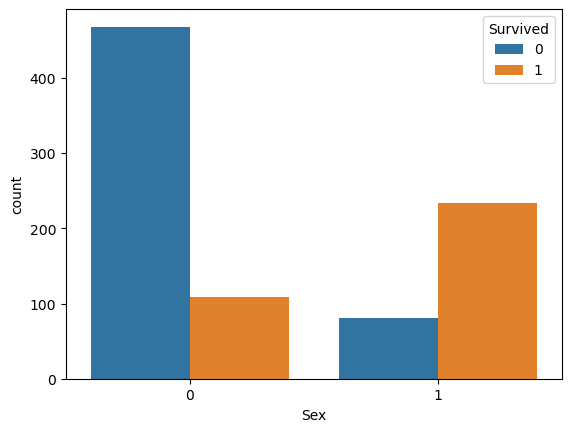

In [90]:
sns.countplot('Sex', hue='Survived', data=train)

Nous remarquons par cet histograme, qu'environ 100 hommes ont survécu contre plus de 450 morts; et qu'une centaine de femmes sont décédées contre environ 250 survivantes. 
Plus de 2/3 des survivants sont des femmes.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

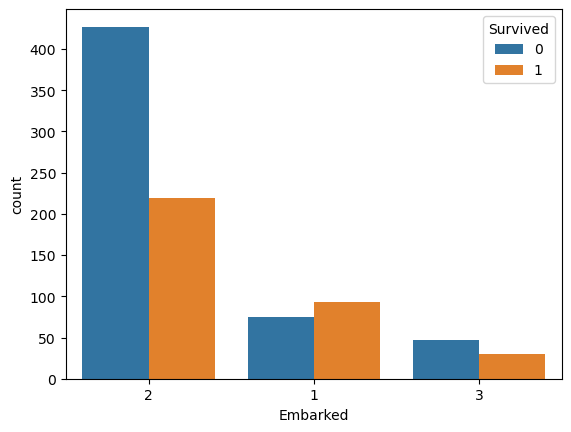

In [91]:
sns.countplot('Embarked', hue='Survived', data=train)

Par cet histogramme, nous réalisons que:
- Pour les passagers ayant embarqué depuis le port de Cherbourg, il y a eu plus de survivants que de morts (environ 75 morts et 90 survivants)
- Pour ceux ayant embarqué depuis le port de Southampton il y a plus de morts que de survivants (plus de 400 morts et environ 230 survivants)
- Pour ceux ayant embarqué depuis le port de Queenstown il y a plus de morts que de survivants (environ 50 morts et 40 survivants)

Ce sont donc les personnes qui ont embarqué depuis le port de Cherbourg qui ont le plus survécu. Et le pourcentage de décès est plus élévé pour ceux qui ont embarqué depuis le port de Southampton. Cela peut être lié à la classe des passagers embarcant dans chaque ports (hypothèse)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

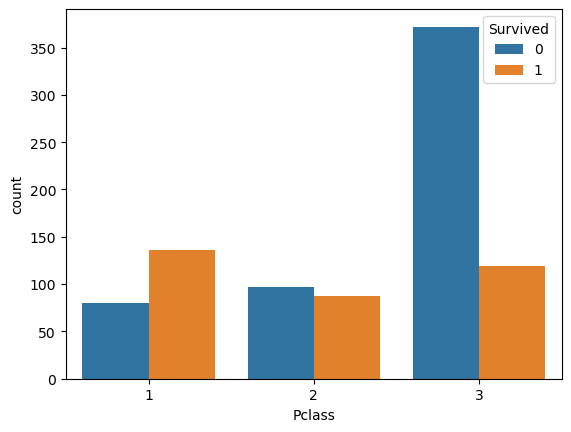

In [92]:
sns.countplot('Pclass', hue='Survived', data=train)

Par cet histogramme, nous remarquons que : 
- Pour les passagers de 1ère classe, il y a largement plus de survivants que de morts (environ 140 survivants et 80 morts)
- Pour ceux de 2ème classe, il y a eu plus de morts que de survivants (environ 85 survivants et 100 morts)
- Pour la 3ème classe sociale, il y a largement plus de morts que de survivants (environ 120 survivants et plus de 370 morts)

Ainsi ce sont les personnes de la première classe qui ont le plus suvécu. Et le pourcentage de décès est plus élévé pour les passagers de 3ème classe.

<AxesSubplot:ylabel='Frequency'>

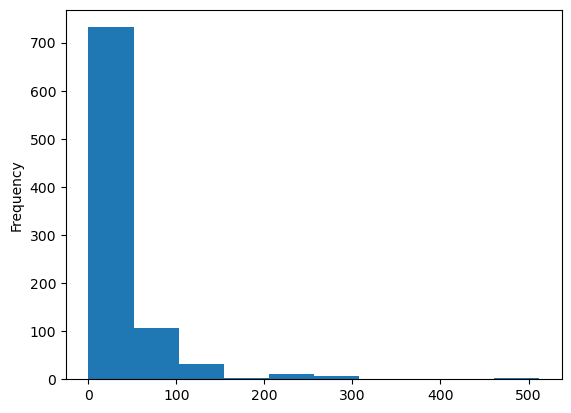

In [93]:
train['Fare'].plot.hist()

Nous remarquons que:
- Plus de 700 passagers ont pris des billets à 50
- Quelques billets  ont couté 500

<AxesSubplot:xlabel='SibSp', ylabel='count'>

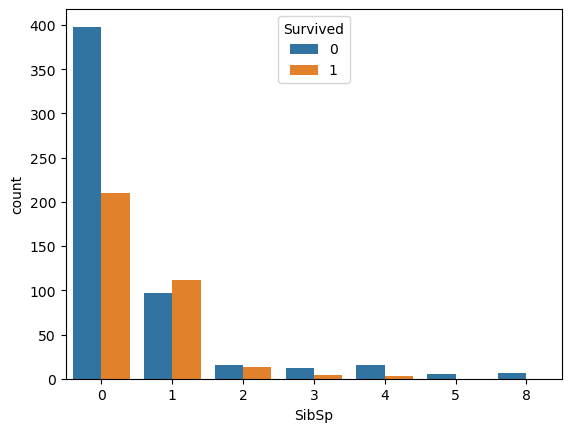

In [94]:
sns.countplot('SibSp', hue='Survived', data=train)

Nous pouvons voir par cet histogramme qu'il y a des passagers qui ont jusqu'à 8 frères/soeurs à bord du bateau.

<AxesSubplot:xlabel='Alone', ylabel='count'>

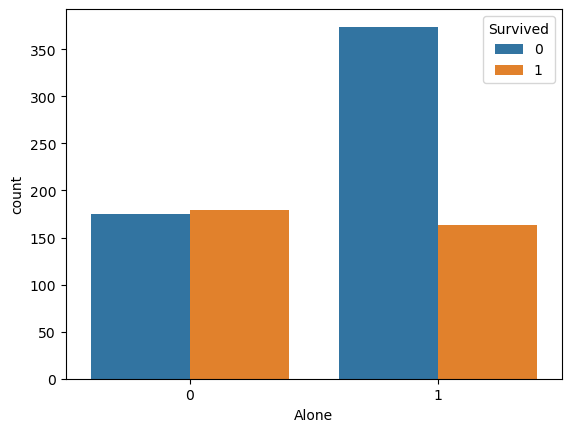

In [95]:
sns.countplot('Alone', hue='Survived', data=train)

Cet histogramme nous montre que:
- Pour les passagers qui étaient seuls à bord, il y a eu un peu près le meme nombre de morts et de survivants(environ 175)
- Pour les passagers qui étaient accompagnés à bord, il y a eu plus de morts que de survivants(environ 170 survivants et plus de 360 morts)

Nous pouvons dire alors que le taux de survie est plus important pour ceux qui étaient seuls.

<AxesSubplot:xlabel='Cabin'>

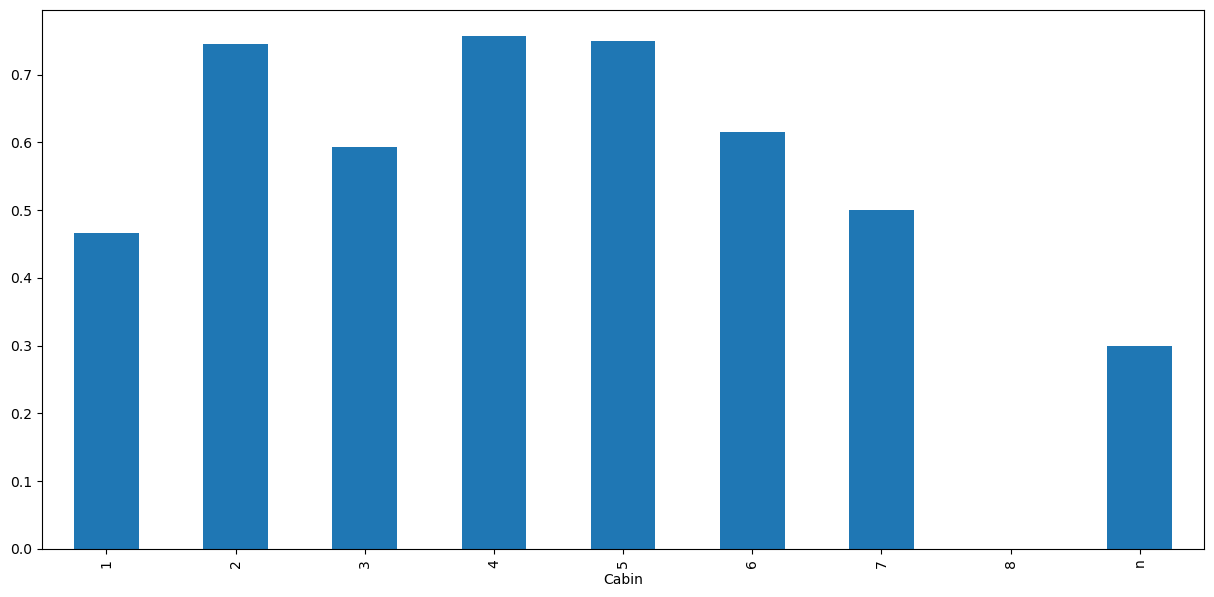

In [96]:
train[['Cabin','Survived']].groupby('Cabin')['Survived'].mean().plot(kind='bar', figsize=(15,7))

Sur cet histogramme, nous observant que:
- La moyenne des passagers vivants dans les cabines B,D et E est supérieure à 0.7
- La moyenne des passagers vivants dont la valeur de "Cabin" est manquante est de 0.3

## E) Standardisation des données

La standardisation des caractéristiques autour du centre avec un écart type de 1 est importante car nous comparons des mesures qui ont des unités différentes (age, monnaie, nombre de famille,...). Les variables mesurées à différentes échelles contribuent de manière différente à l’analyse. La variable qui prend de grandes valeurs l'emportera sur celle qui prend de petites valeurs, ce qui peut générer de fausses informations sur la corrélation des features.

In [97]:
train['Fare']=(train['Fare']-train['Fare'].mean())/train['Fare'].std()
train['Age']=(train['Age']-train['Age'].mean())/train['Age'].std()

Text(0.5, 1.0, 'Matrice de corrélation ')

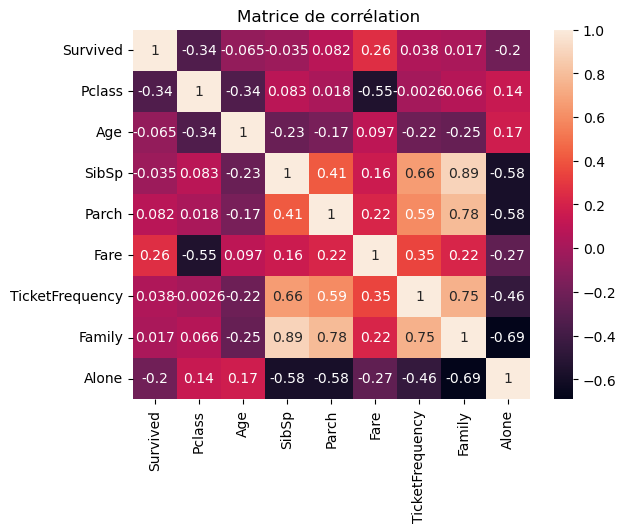

In [98]:
sns.heatmap(train.corr(),annot=True).set_title('Matrice de corrélation ')

Nous pouvons voir qu'il n'y a pas vraiment de corrélation entre les features.
Il y a les colonnes "Pclass" et "Alone" qui ont une légère corrélation négative avec la colonne "Survived" et il y a aussi la colonne "Fare" qui corrèle positivement avec "Survived".

## F) Supression des features moins importantes

Après avoir essayé plusieurs fois les algorithmes sur les différents features, nous avons conclu qu'il faut supprimer les features suivants:
- 'Name'
- 'Civility'
- 'Ticket'
- 'Cabin'
- 'TicketFrequency'
- 'Family'
- 'Alone'

In [99]:
features_drop=['Name','Civility','Ticket','Cabin','TicketFrequency','Family','Alone']
train=train.drop(features_drop, axis=1)

# 2] Les algorithmes de prédiction


In [100]:
#Importation des bibliothèques des différents algorithmes que nous allons utiliser
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## A) Prétraitement des données

In [101]:
#Lecture des données du dataframe test
test = pd.read_csv('./../Data/test.csv')
test_ids=test['PassengerId']

Nous allons reproduire sur test les mêmes modifications que celles faites sur le dataframe "train" pour pouvoir le tester. Il s'agit du prétraitement des données (pre-processing).

In [102]:
#Age
#test['Age'] = test['Age'].fillna(test.query('Pclass==1')['Age'].median())
#test['Age'] = test['Age'].fillna(test.query('Pclass==2')['Age'].median())
#test['Age'] = test['Age'].fillna(test.query('Pclass==3')['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Age']=(test['Age']-test['Age'].mean())/test['Age'].std()


#Sex
test.loc[test.Sex=="male",'Sex']='0'
test.loc[test.Sex=="female",'Sex']='1'

#Embarked
test.loc[test.Embarked=="C",'Embarked']='1'
test.loc[test.Embarked=="S",'Embarked']='2'
test.loc[test.Embarked.isna(),'Embarked']='2'
test.loc[test.Embarked=="Q",'Embarked']='3'

#Fare
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test['Fare']=(test['Fare']-test['Fare'].mean())/test['Fare'].std()

#Features moins importants
features_drop=['Name','Ticket','Cabin','PassengerId']
test=test.drop(features_drop, axis=1)

In [103]:
#Les variables d'entrées sont toutes les colonnes de la base de donnée, et la variable de sortie est "Survived"
X=train.drop('Survived', axis=1)
y=train["Survived"]

Nous allons diviser le dataframe "train" en deux: X_train et X_test
- X_train contient 70% du "train" et servira pour entrainer le modèle
- X_test contient 30% du "train" et servira pour tester le modèle

Le paramètre random_state sert à garantir que c'est la meme division qui se passerait à chaque exécution.

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

## B) KNeighborsClassifier

L'algorithme des k plus proches voisins est un algorithme simple et facile, c'est un discriminant d'apprentissage supervisé qui utilise la proximité pour effectuer des classifications ou des prédictions sur le regroupement d'un point de données individuel : un point de requête est attribué à la classe de données qui a le plus de représentants parmi les voisins les plus proches du point. 

In [105]:
model1=KNeighborsClassifier(n_neighbors = 8)

La fonction fit() entraîne l'algorithme sur les données d'entraînement qui sont une entrée que nous utilisons pour permettre à l'algorithme d'apprentissage automatique d'"apprendre", afin qu'il puisse améliorer ses performances sur la survie ou non d'un passager.

In [106]:
model1.fit(X,y)

KNeighborsClassifier(n_neighbors=8)

La fonction predict() permet de prédire dans ce cas la survie ou non d'un passager,elle renvoie la colonne "Survived" du dataframe passé en argument en fonction des données apprises obtenues à partir du modèle.

In [107]:
X_test_prediction=model1.predict(X_test)
X_train_prediction=model1.predict(X_train)
predKNC = X_test_prediction

La fonction accuracy_score() est utilisée pour calculer le nombre de prédictions correctes. Elle représente le rapport de la somme des vrais positifs (le passager a survécu et prévu survivant dans notre cas) et des vrais négatifs (le passager est mort et prévu mort) sur toutes les prédictions.

In [108]:
acc1=accuracy_score(y_test,X_test_prediction)
acc2=accuracy_score(y_train,X_train_prediction)

In [109]:
print(acc1)
print(acc2)

0.8134328358208955
0.8459069020866774


## C) DecisionTreeClassifier


Decision Tree est un algorithme permettant de classifier des données en se basant sur des suites de conditions. Il se compose de noeud, de branche et de feuilles. Dans un noeud, l’algorithme teste un feature du dataset pour discriminer les données et crée une règle de discrimination. Le Decision Tree continue ce processus jusqu’à obtenir des groupes qui correspondent le mieux possible à chacune des classes.

In [110]:
model2=DecisionTreeClassifier()

In [111]:
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [112]:
X_test_prediction=model2.predict(X_test)
X_train_prediction=model2.predict(X_train)
predDTC = X_test_prediction

In [113]:
acc3=accuracy_score(y_test,X_test_prediction)
acc4=accuracy_score(y_train,X_train_prediction)

In [114]:
print(acc3)
print(acc4)

0.7873134328358209
0.9887640449438202


## D) Random Forest

Le Random Forest est un algorithme composé de plusieurs arbres. Chaque arbre est entraîné sur un sous-ensemble du dataset et donne un résultat (survivant ou mort dans notre cas). Les résultats de tous les arbres de décision sont combinés pour donner une réponse finale. Chaque arbre vote et la réponse finale est celle qui est la majoritaire (majority voting).

In [115]:
model3=RandomForestClassifier(n_estimators=160,max_depth=13)

In [116]:
model3.fit(X_train,y_train)

RandomForestClassifier(max_depth=13, n_estimators=160)

In [117]:
X_test_prediction=model3.predict(X_test)
X_train_prediction=model3.predict(X_train)
predRF = X_test_prediction

In [118]:
acc5=accuracy_score(y_test,X_test_prediction)
acc6=accuracy_score(y_train,X_train_prediction)

In [119]:
print(acc5)
print(acc6)

0.8395522388059702
0.9791332263242376


In [120]:
#On prédit sur le dataframe "test"
submission_preds=model3.predict(test)

In [121]:
#Creation du dataframe df qui contient uniquement deux colonnes, "PassengerId" et "Survived"(prédit auaparavant) pour le
#soumettre sur Kaggle
df=pd.DataFrame({"PassengerId":test_ids.values,
                 "Survived":submission_preds,
                })

In [122]:
df.to_csv("submission.csv", index=False)

Text(0.5, 1.0, 'Feature Importance')

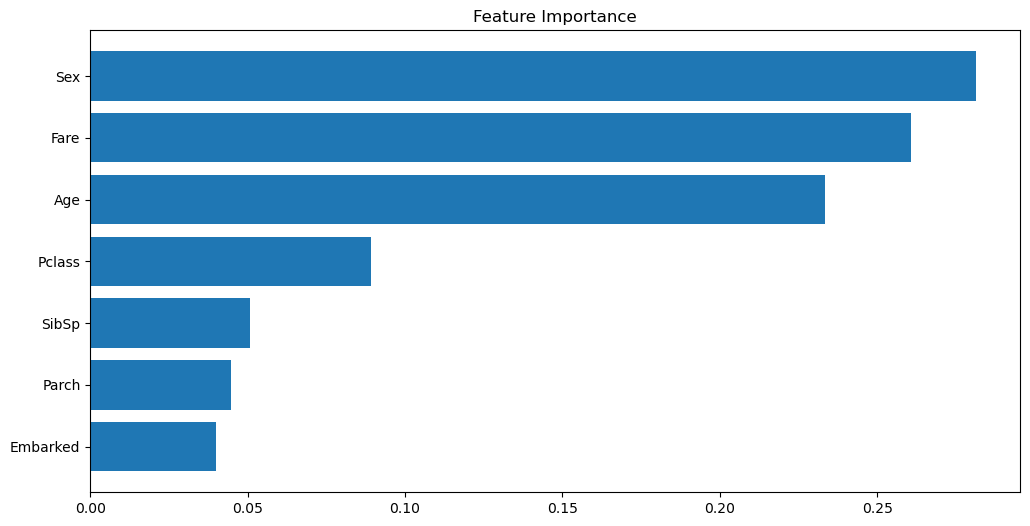

In [123]:
feature_importance = model3.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

Par cette figure, nous constatons que pour le modèle "Random Forest", les features les plus influents sur la survie ou non d'un passager sont "Sex", "Fare" et "Age".

In [124]:
#matrice de confusion
matrix = confusion_matrix(y_test,X_test_prediction)
print(matrix)

[[150  10]
 [ 33  75]]


La matrice de confusion nous montre que:
- Le modèle a correctement prédit la mort de 146 passagers.
- Le modèle a correctement prédit la survie de 72 passagers.
- Le modèle a prédit la mort de 14 passagers survivants.
- Le modèle a prédit la survie de 36 qui sont pourtant morts.

## E) GaussianNB

L'algorithme Gaussian Naive Bayes est un modèle supervisé permettant la classification en se basant sur le théorème de Bayes avec une forte indépendance des hypothèses c’est-à-dire pas de corrélation entre les caractéristiques d’un ensemble de données.

In [125]:
model4=GaussianNB()

In [126]:
model4.fit(X,y)

GaussianNB()

In [127]:
X_test_prediction=model4.predict(X_test)
X_train_prediction=model4.predict(X_train)
predGNB = X_test_prediction

In [128]:
acc7=accuracy_score(y_test,X_test_prediction)
acc8=accuracy_score(y_train,X_train_prediction)

In [129]:
print(acc7)
print(acc8)

0.7873134328358209
0.7929373996789727


## F) LinearSupportVectorMachine


L'algorithme LinearSupportVectorMachine cherche à trouver un hyperplan dans un espace à N dimensions (N étant le nombre de features) qui classe distinctement les points de données c'est-à-dire que la distance est maximale entre les points de données.

In [130]:
model5=LinearSVC()
model5.fit(X,y)
X_test_prediction=model5.predict(X_test)
predLSV = X_test_prediction
X_train_prediction=model5.predict(X_train)
acc9=accuracy_score(y_test,X_test_prediction)
acc10=accuracy_score(y_train,X_train_prediction)
print(acc9)
print(acc10)

0.7761194029850746
0.8105939004815409


C:\Users\mtmta\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## G) LogisticRegression

La régression logistique s'appuit sur le fonction sigmoïde qui génère des valeurs entre 0 et 1. Puisque la réponse est binaire (survivant ou non dans notre exemple), la variable de réponse a une distribution de Bernoulli. De plus, chaque résultat de réponse est déterminé par la probabilité de succès prédite.

In [131]:
model6=LogisticRegression()

In [132]:
model6.fit(X,y)

LogisticRegression()

In [133]:
X_test_prediction=model6.predict(X_test)
X_train_prediction=model6.predict(X_train)
predLR = X_test_prediction

In [134]:
acc11=accuracy_score(y_test,X_test_prediction)
acc12=accuracy_score(y_train,X_train_prediction)

In [135]:
print(acc11)
print(acc12)

0.7723880597014925
0.8105939004815409


## H) AdaBoost

Ada-boost est l'un des classificateurs de renforcement d'ensemble. Il combine plusieurs classificateurs pour augmenter la précision de ses derniers. Le classificateur AdaBoost crée,en combinant plusieurs classificateurs peu performants, un classificateur puissant de haute précision. Le concept de base est de définir les poids des classificateurs et de former l'échantillon de données à chaque itération de manière à garantir des prédictions précises d'observations inhabituelles.


In [136]:
model7=AdaBoostClassifier(n_estimators=40, random_state=0)

In [137]:
model7.fit(X,y)

AdaBoostClassifier(n_estimators=40, random_state=0)

In [138]:
X_test_prediction=model7.predict(X_test)
X_train_prediction=model7.predict(X_train)
predADA = X_test_prediction

In [139]:
acc13=accuracy_score(y_test,X_test_prediction)
acc14=accuracy_score(y_train,X_train_prediction)

In [140]:
print(acc13)
print(acc14)

0.8022388059701493
0.8426966292134831


# 3] Interprétations des résultats

In [141]:
results = pd.DataFrame({
    'Model': ['KNeighborsClassifier','DecisionTreeClassifier',
              'RandomForest','GaussianNB',
              'LinearSupportVectorMachine','LogisticRegression','AdaBoostClassifier'],
    'Score': [acc1, acc3,acc5,acc7,acc9,acc11,acc13]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,Score
Model,
RandomForest,0.839552
KNeighborsClassifier,0.813433
AdaBoostClassifier,0.802239
DecisionTreeClassifier,0.787313
GaussianNB,0.787313
LinearSupportVectorMachine,0.776119
LogisticRegression,0.772388


## Association des modèles 

On observe que le modèle Random Forest est le plus efficace.

Pour aller plus loin, on peut associer (ou fusionner) les modèles et procéder à un 'voting' : 

   - On prend les prédictions de chaque modèles et on les réunis dans un même dataframe. 

   - On créer alors une nouvelle colonne 'survived' qui renvoie la réponse la plus donnée par les modèles. On prend la réponse la plus populaire. En cas d'égalité, on décide de conserver la prédiction du modèle Random Forest étant donné qu'il est le plus performant. 
    
Cette technique peut fonctionner si certains modèles échouent là où les autres réussisent.

In [142]:
dfID = pd.DataFrame(index=range(268))
dfID['Id'] = range(1, 269)
tab = pd.DataFrame({'PassengerId': dfID['Id'], 'predRF': predRF, 'predKNC': predKNC,'predGNB': predGNB,'predLSV': predLSV,'predDTC': predDTC, 'predADA': predADA, 'predLR': predLR})

In [146]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
tab

,PassengerId,predRF,predKNC,predGNB,predLSV,predDTC,predADA,predLR,Survived
0,1,1,0,0,0,0,0,0,0.0
1,2,0,0,0,0,0,0,0,0.0
2,3,1,1,1,1,1,1,1,1.0
3,4,0,1,0,0,0,0,0,0.0
4,5,0,0,0,0,0,0,0,0.0
5,6,0,0,0,0,0,0,0,0.0
6,7,0,0,0,0,0,1,0,0.0
7,8,0,0,0,0,0,0,0,0.0
8,9,0,0,1,0,0,0,0,0.0
9,10,0,0,0,0,0,0,0,0.0


In [147]:
# On calcule la valeur la plus donnée parmi les prédictions
tab['Survived'] = tab[['predRF', 'predKNC', 'predGNB', 'predLSV', 'predADA', 'predLR']].mode(axis=1).iloc[:,0]

# Si plusieurs valeurs ont la même fréquence on prend celle de predRF
tab['Survived'] = tab['Survived'].fillna(tab['predRF'])
predALL = tab['Survived']
tab

,PassengerId,predRF,predKNC,predGNB,predLSV,predDTC,predADA,predLR,Survived
0,1,1,0,0,0,0,0,0,0.0
1,2,0,0,0,0,0,0,0,0.0
2,3,1,1,1,1,1,1,1,1.0
3,4,0,1,0,0,0,0,0,0.0
4,5,0,0,0,0,0,0,0,0.0
5,6,0,0,0,0,0,0,0,0.0
6,7,0,0,0,0,0,1,0,0.0
7,8,0,0,0,0,0,0,0,0.0
8,9,0,0,1,0,0,0,0,0.0
9,10,0,0,0,0,0,0,0,0.0


In [145]:
# On détermine la précision de la nouvelle prédiction
accALL=accuracy_score(y_test,predALL)
print(accALL)

0.7985074626865671


On obtient ici un score inférieur à celui obtenu avec le modèle Random Forest.
Dans notre cas l'utilisation d'un seul modèle conduit a de meilleurs résultats que l'utilisation de plusieurs modèles combinés. Cela peut s'expliquer de plusieurs façons: 
- La diversité des modèles: Si les modèles utilisés sont similaires dans leur   manière de traiter les données, alors l'association de ces modèles ne fournira pas une diversité suffisante pour améliorer la performance de prédiction. Au contraire, cela peut même entraîner une réduction de la performance en raison de la corrélation entre les prédictions des modèles similaires. Dans notre cas, les modèles RandomForest et Decision Tree Classifier peuvent conduire à ce type d'erreurs.
- Les erreurs de prédictions récurrentes : si 2 modèles ou plus reproduisent les mêmes erreurs, alors la pondérations des résultats ne premettra pas aux autres modèles de corriger ces prédiction et conduira à une perte d'efficacité du modèle.
- l'overfitting: Si les modèles utilisés ont été entrainés sur des données qui ne sont pas totalement otpimisé pour obtenir le meilleur résultat, alors on peut obtenir des erreurs, notamment sur les nouvelles données.


Pour améliorer ce score, on a réfléchit à plusieurs solutions pour résoudre chacun de ces problèmes :  
- Ne conserver que les modèles qui, une fois combinés, seraient les plus performants. Pour ce faire, il faudrait tester toute les combinaisons de modèles et analyser les résultats.
- Attribuer à chaque modèles un coefficient influent dans le résultat pondéré. Cela permettrait d'éviter les erreurs de prédictions et pourrait permettre aux modèles de mieux se compenser entre eux.
- Créer une fonction de préprocessing propre à chaque modèle. Cela éviterai les problèmes d'overfitting et conduirait à une amélioration globale de performances de tous les modèles. En effet, notre fonction de prétraitement est efficace mais nous avons choisi de l'optimiser pour le modèle Random Forest. 

Nous avons fais le choix de conserver le modèle Random Forest et de l'optimsier afin d'en tirer le meilleur. En effet, la fusion des modèles aurait pris trop de temps sans nécessairement aboutir à de meilleurs performances.

# 4] Soumission et score Kaggle :

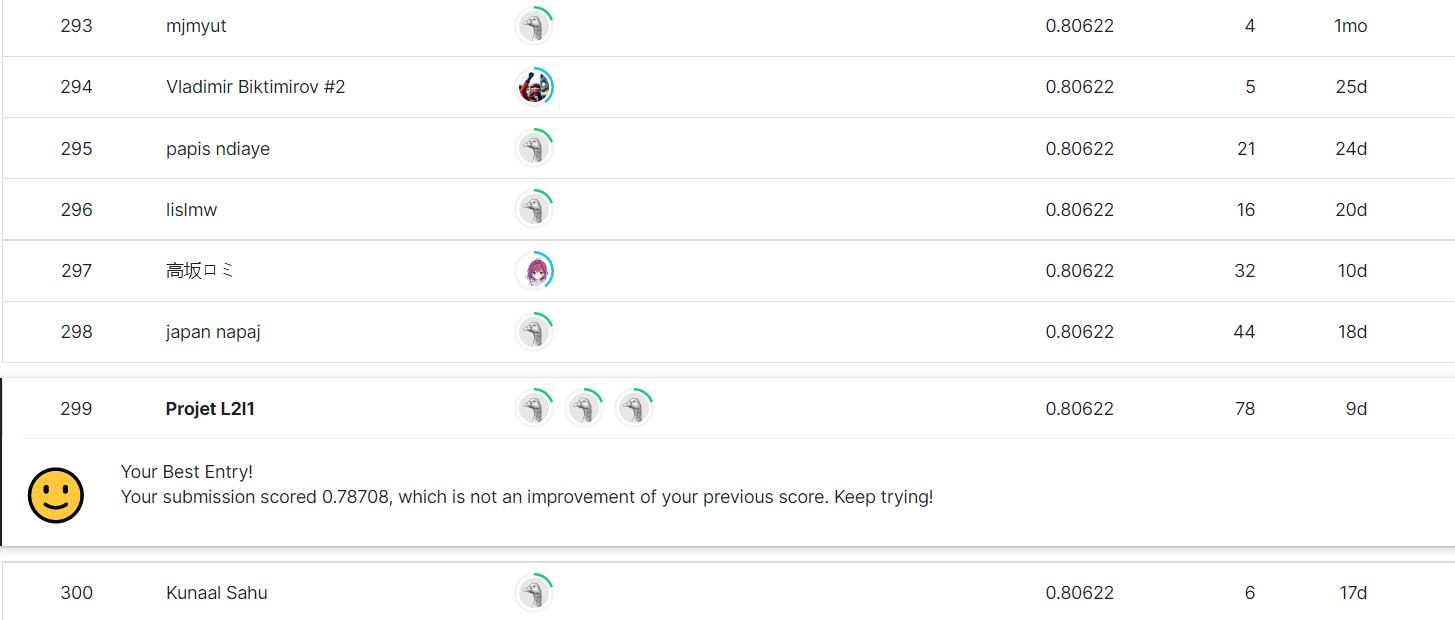

Nous avons obtenu un classement final de 299 / 16,389 avec un score de 0.80622.

Sachant qu'il y a 110 tricheurs (le Score de 1.00 peut être ovtenu en récuperant les data de test)

On peut estimer notre classement à 189/16,389 soit le top 1,2 %.

Nous avons atteint l'objectif fixé en début de projet : un score d'au moins 0.8 soit 80% de précision !
